<a href="https://colab.research.google.com/github/shreyahegde18/Image-Compression-using-SVD/blob/main/Image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Reconstruction using Singular Value Decomposition (SVD)**

In [ ]:
# import module
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt


Original Image

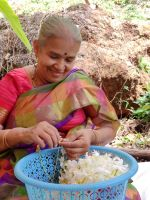

You can get direct URL of the image with that help of below mentioned website
https://postimage.org/ 

In [ ]:
# assign and open image
#paste the URL

url = 'https://i.postimg.cc/TPvFbR4c/IMG-20210602-WA0025.jpg'
response = requests.get(url, stream=True)
  
with open('image.png', 'wb') as f:
    f.write(response.content)
  
img = cv2.imread('image.png')

In [ ]:
# Converting the image into gray scale for faster
# computation.
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Calculating the SVD
u, s, v = np.linalg.svd(gray_image, full_matrices=False)
  
# inspect shapes of the matrices
print(f'u.shape:{u.shape},s.shape:{s.shape},v.shape:{v.shape}')

u.shape:(800, 600),s.shape:(600,),v.shape:(600, 600)


The above output shape indicates that there are 600 linearly independent eigenvectors in this image.

variance Explained by Top 20 singular values:
[9.12541e-01 1.59620e-02 1.28370e-02 6.82500e-03 5.86600e-03 3.84300e-03
 3.62000e-03 2.73000e-03 2.09500e-03 1.76100e-03 1.48300e-03 1.35300e-03
 1.32200e-03 1.10100e-03 9.30000e-04 9.22000e-04 8.84000e-04 7.78000e-04
 7.28000e-04 7.14000e-04]


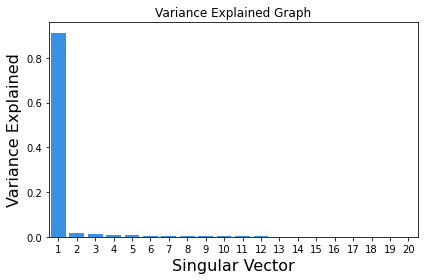

In [ ]:
# import module
import seaborn as sns
  
var_explained = np.round(s**2/np.sum(s**2), decimals=6)
  
# Variance explained top Singular vectors
print(f'variance Explained by Top 20 singular values:\n{var_explained[0:20]}')
  
sns.barplot(x=list(range(1, 21)),
            y=var_explained[0:20], color="dodgerblue")
  
plt.title('Variance Explained Graph')
plt.xlabel('Singular Vector', fontsize=16)
plt.ylabel('Variance Explained', fontsize=16)
plt.tight_layout()
plt.show()

The Variance Explained Graph above clearly shows that about 90% of information is explained by the first eigenvector and its corresponding eigenvalues themselves. Therefore, it very much advisable to reconstruct the image with just the top few eigenvectors themselves. 

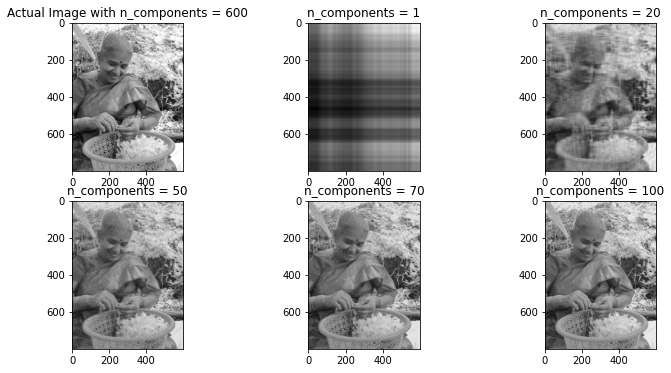

In [25]:
# plot images with different number of components
comps = [600, 1, 20,50,70,100]
plt.figure(figsize=(12, 6))

for i in range(len(comps)):
	low_rank = u[:, :comps[i]] @ np.diag(s[:comps[i]]) @ v[:comps[i], :]
	
	if(i == 0):
		plt.subplot(2, 3, i+1),
		plt.imshow(low_rank, cmap='gray'),
		plt.title(f'Actual Image with n_components = {comps[i]}')
	
	else:
		plt.subplot(2, 3, i+1),
		plt.imshow(low_rank, cmap='gray'),
		plt.title(f'n_components = {comps[i]}')


Though the 1st eigenvector contains around 90% of information reconstructing an image solely from it does not give a clear picture.
Using the top 100 vectors for the image reconstruction gives a good enough approximation. Also out of 600 vectors which is a massive decrease in computation and also it compresses the image.